In [9]:
'''
About dataset:
- There are 24 videos.
- Comprised of PESU Academy videos of Cloud Computing course, all following the same slide structure.
- Videos range from 7 mins to 34 mins in duration, with total duration of 7.12 hours.
- There are 547 question-answer details.
- Deviation from actual start-time of answers when start of the video is taken as the predicted start-time:
    - Average of 493.8s or 46% of video, 
    - Average of 352.5s or 35.4% of video, ignoring 20% of outliers
'''
''''''

''

In [10]:
import pandas as pd
from utils import showAvgPlots

In [11]:
dset = pd.read_csv('../cc-dset-questions-v1.csv')
dsetDetails = pd.read_csv('../cc-dset-vid-details.csv')

In [12]:
#Video-Count #Duration Details
print('No. of videos:', len(dsetDetails))
print('Total duration:', f"{round(sum(dsetDetails['Duration'])/3600, 2)} Hours")
print('Duration Details (in Min):')
print(dsetDetails['Duration'].map(lambda x: x/60).describe())


No. of videos: 24
Total duration: 7.12 Hours
Duration Details (in Min):
count    24.000000
mean     17.806250
std       6.330024
min       7.450000
25%      13.475000
50%      16.983333
75%      21.183333
max      34.033333
Name: Duration, dtype: float64


Questions-dataset details

In [13]:
dset.head()

,Video_ID,Question,Start_timestamp
0,101,What is authentication?,28
1,101,What is Keystone?,54
2,101,What is a project in Keystone?,80
3,101,What is the fundamental purpose of the keystone?,92
4,101,What does assigning role to a user or user gro...,113


In [14]:
print('No. of questions: ', len(dset))

No. of questions:  547


100% Mean: 46.08
80% Mean: 35.44


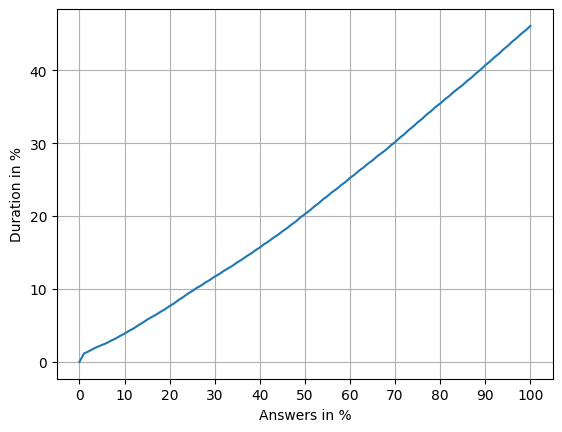

100% Mean: 493.81
80% Mean: 352.51


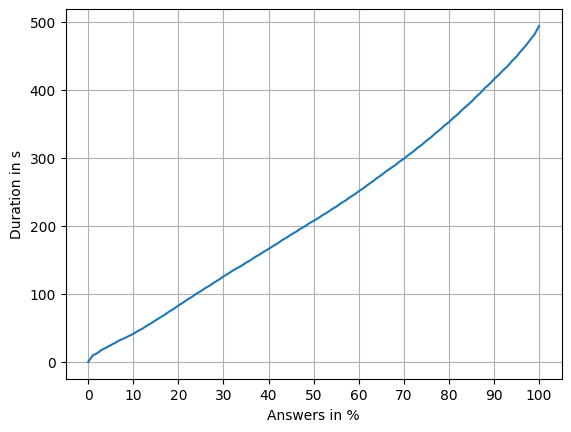

In [15]:
temp = dset.join(dsetDetails.set_index('Video_ID'), on='Video_ID')

errs = list((temp['Start_timestamp']*100)/temp['Duration'])
showAvgPlots(errs, ylabel='Duration in %')
errs = list(temp['Start_timestamp'])
showAvgPlots(errs, ylabel='Duration in s')

In [16]:
#Shows average deviation of actual start point of answers from choosen start point in both seconds and percentage.
#Average deviation vs Best X% answers ie ignoring (100-X)% as outliers